___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

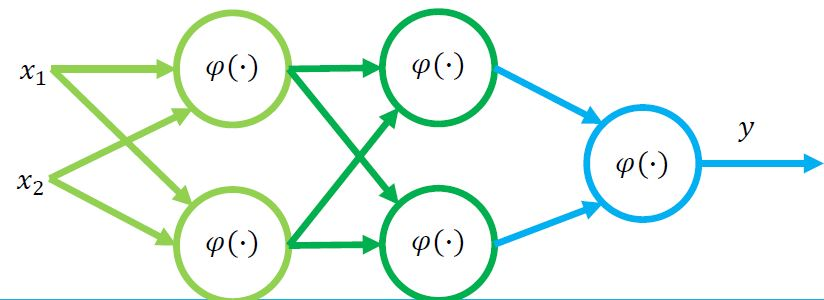

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 0.7720 - accuracy: 0.5065
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7588 - accuracy: 0.5196
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.5326
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.5512
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7243 - accuracy: 0.5568
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.5624
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5791
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5903
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5959
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6052
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7579
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7598
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.7598
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7598
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7616
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7616
Epoch 90/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7616
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7616
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7616
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7616
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 0.4680 - accuracy: 0.7747
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4679 - accuracy: 0.7765
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7765
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7765
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.7765
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7765
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7765
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7784
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7765
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7765
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

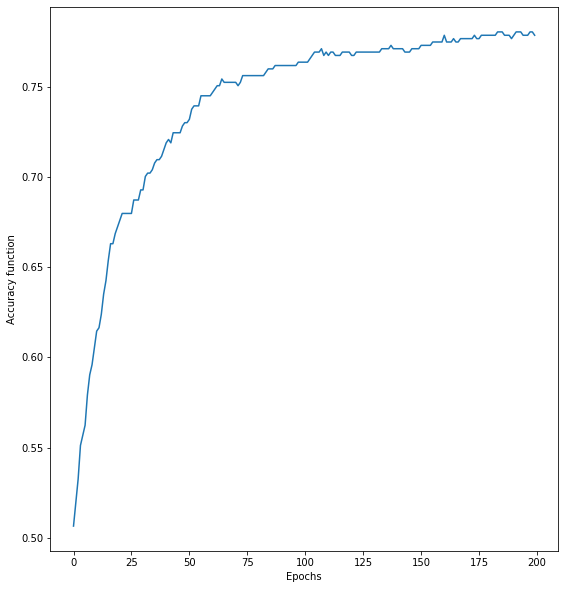

In [9]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


In [11]:
Y_pred

array([[0.27585387],
       [0.16865632],
       [0.10247338],
       [0.16279823],
       [0.5467977 ],
       [0.43701512],
       [0.03869197],
       [0.5348537 ],
       [0.6182447 ],
       [0.84859204],
       [0.18897173],
       [0.88060284],
       [0.5025361 ],
       [0.26732284],
       [0.08342192],
       [0.3488713 ],
       [0.11457938],
       [0.05950645],
       [0.723921  ],
       [0.6021759 ],
       [0.2501566 ],
       [0.07982606],
       [0.4413163 ],
       [0.07594666],
       [0.5247314 ],
       [0.83336496],
       [0.09520382],
       [0.05878726],
       [0.27632678],
       [0.14193693],
       [0.7837929 ],
       [0.88735473],
       [0.78086394],
       [0.7541658 ],
       [0.5586084 ],
       [0.6492437 ],
       [0.8877003 ],
       [0.28148115],
       [0.38098294],
       [0.6418467 ],
       [0.06454009],
       [0.6745195 ],
       [0.6208812 ],
       [0.26130196],
       [0.06788546],
       [0.5437995 ],
       [0.6681529 ],
       [0.178

In [12]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7359
[0.5357334017753601, 0.7359307408332825]


In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.778 	 0.717 	 0.606
  Test 	 0.736 	 0.623 	 0.600


In [15]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [17]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD

In [18]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [22]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [23]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [24]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 145ms/step - loss: 1.3618 - accuracy: 0.3750 - val_loss: 1.3780 - val_accuracy: 0.2000
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 1.2491 - accuracy: 0.2750 - val_loss: 0.7741 - val_accuracy: 0.4333
Epoch 3/200
2/2 [==============================] - 0s 43ms/step - loss: 0.7914 - accuracy: 0.4917 - val_loss: 0.5658 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6603 - accuracy: 0.5833 - val_loss: 1.3022 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 50ms/step - loss: 1.3477 - accuracy: 0.6583 - val_loss: 0.7898 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 49ms/step - loss: 0.7167 - accuracy: 0.6750 - val_loss: 0.4108 - val_accuracy: 0.9667
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 0.4193 - accuracy: 0.9000 - val_loss: 0.5273 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 42ms/step - loss: 0.1337 - accuracy: 0.9583 - val_loss: 0.2143 - val_accuracy: 0.8667
Epoch 60/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1969 - accuracy: 0.9167 - val_loss: 0.5063 - val_accuracy: 0.8333
Epoch 61/200
2/2 [==============================] - 0s 52ms/step - loss: 0.3372 - accuracy: 0.8250 - val_loss: 0.3854 - val_accuracy: 0.8000
Epoch 62/200
2/2 [==============================] - 0s 41ms/step - loss: 0.3263 - accuracy: 0.8750 - val_loss: 0.2948 - val_accuracy: 0.8333
Epoch 63/200
2/2 [==============================] - 0s 47ms/step - loss: 0.2006 - accuracy: 0.9333 - val_loss: 0.1157 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 45ms/step - loss: 0.1193 - accuracy: 0.9667 - val_loss: 0.1130 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1136 - accuracy: 0.9750 - val_loss: 0.1100 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 42ms/step - loss: 0.1279 - accuracy: 0.9500 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0782 - accuracy: 0.9833 - val_loss: 0.1109 - val_accuracy: 0.9333
Epoch 119/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0836 - accuracy: 0.9667 - val_loss: 0.2153 - val_accuracy: 0.8667
Epoch 120/200
2/2 [==============================] - 0s 49ms/step - loss: 0.1135 - accuracy: 0.9500 - val_loss: 0.2075 - val_accuracy: 0.9000
Epoch 121/200
2/2 [==============================] - 0s 35ms/step - loss: 0.2103 - accuracy: 0.9250 - val_loss: 0.0681 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0960 - accuracy: 0.9667 - val_loss: 0.0827 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.0704 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0689 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0907 - accuracy: 0.9500 - val_loss: 0.0669 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.0772 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0979 - accuracy: 0.9583 - val_loss: 0.0978 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0975 - accuracy: 0.9750 - val_loss: 0.1011 - val_accuracy: 0.9333
Epoch 181/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0793 - accuracy: 0.9667 - val_loss: 0.2788 - val_accuracy: 0.8667
Epoch 

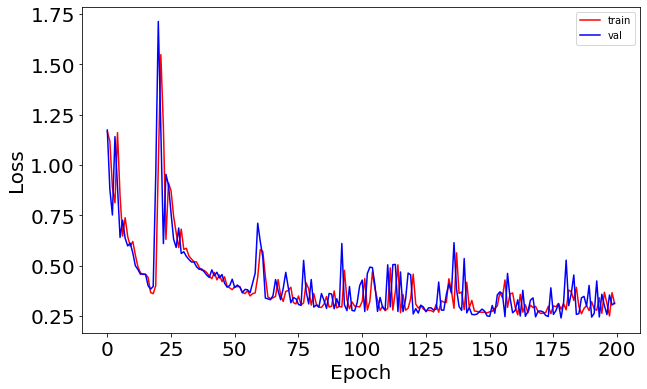

In [25]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [26]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

In [27]:
Y_pred

array([[2.7642467e-03, 9.7944206e-01, 1.7793715e-02],
       [9.9992239e-01, 7.5623706e-05, 2.0235868e-06],
       [6.4502169e-15, 1.8102297e-05, 9.9998188e-01],
       [1.8099832e-03, 9.7208452e-01, 2.6105562e-02],
       [4.7220332e-03, 9.8441386e-01, 1.0864151e-02],
       [9.9967253e-01, 3.2029630e-04, 7.1501336e-06],
       [1.1791621e-02, 9.8361820e-01, 4.5901188e-03],
       [6.1041624e-06, 3.2887107e-01, 6.7112285e-01],
       [1.2293817e-04, 7.8433281e-01, 2.1554424e-01],
       [1.1791621e-02, 9.8361820e-01, 4.5901188e-03],
       [2.4081408e-05, 5.3135127e-01, 4.6862468e-01],
       [9.9952281e-01, 4.6726016e-04, 9.9477975e-06],
       [9.9996281e-01, 3.6120222e-05, 1.0604676e-06],
       [9.9956423e-01, 4.2658520e-04, 9.1862994e-06],
       [9.9990726e-01, 9.0326335e-05, 2.3637067e-06],
       [4.7565484e-03, 9.8445255e-01, 1.0790875e-02],
       [1.7741465e-10, 2.5580162e-03, 9.9744201e-01],
       [1.1791621e-02, 9.8361820e-01, 4.5901188e-03],
       [1.3781158e-03, 9.653

In [28]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [29]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [30]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [31]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.967 	 0.967
  Test 	 0.933 	 0.945 	 0.933


In [32]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
